# Graduate work


[Formulation of the problem](#Formulation-of-the-problem) <br>
[Codebook](#Codebook)<br>
[Job Requirements](#Job-Requirements)<br>
[Evaluation criteria](#Evaluation-criteria)<br>



## Formulation of the problem

Like any business, Megafon wants to increase the satisfaction of its customers with the quality of services. This is an important task for retaining users - both long-term and newly attracted. After all, the costs of marketing and promotion will not be justified if the client leaves due to poor communication quality. However, in the real world, resources are always limited, and in a unit of time, the technical department can solve a finite number of tasks. <br>
In order to do this most effectively, it is important to determine which technical indicators of communication quality have the greatest impact on customer satisfaction, and first of all direct resources to work with them. To do this, Megafon conducted a survey of its customers, inviting them to assess the level of satisfaction with the quality of communication. For each client who completed the survey, technical indicators were collected. <br>
Prepare a study for MegaFon and analyze how (and does) the assessment that the client puts in the survey depends on the technical indicators that were collected. <br><br><br>

**More details about the survey:**

During the survey, Megafon offered its customers to rate their satisfaction with the quality of communication on a ten-point scale (where 10 is “excellent” and 1 is “terrible”). If the client rated the quality of communication at 9 or 10 points, the survey ended. If the client rated below 9, a second question was asked - about the reasons for dissatisfaction with the quality of communication with the provided numbered answer options. The answer could be given in a free format or list the answer numbers separated by commas. Below you can find an infographic on the structure of the survey.<br>

*Please note that for the work you are given real data, which may lead to the need for additional processing.*

![](https://sun9-32.userapi.com/C6vN5pHQW7hlseIt0AtTN7qNDQbDnHXdt1P2NA/ILntXqa-RrA.jpg)

## Codebook

`megafon.csv`contains the following values: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — subscriber ID;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — the answer to the first question;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — answer to the second question;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — data traffic volume <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — average speed "to the subscriber" <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— average speed "from the subscriber" <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — frequency of resending packets "to the subscriber" <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — streaming video download speed <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — video playback start delay <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — web page loading speed through the browser <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — ping while browsing the web<sup>8 </sup>.<br>


<sup>1 </sup> — How actively the subscriber uses the mobile Internet.<br>
<sup>2 </sup> — Counted over all data traffic.<br>
<sup>3 </sup> — Counted over all data traffic.<br>
<sup>4 </sup> — The higher, the worse. If an error occurs on the channel, the packet is resent. Reduced useful speed.<br>
<sup>5 </sup> — The higher the better - fewer interruptions and better picture quality.<br>
<sup>6 </sup> — How much time will elapse between pressing the Play button and the start of video playback. The shorter the time, the faster playback starts.<br>
<sup>7 </sup> — The higher the better.<br>
<sup>8 </sup> — Less is better - web pages load faster.<br>

The first technical indicator is presented as the sum of the period of one week before participation in the survey. The remaining technical indicators reflect the average value for this attribute for a period of one week before participation in the survey.

# Job Requirements

Make up a work of several parts, each of which formulates a question to the data or a statistical hypothesis about the data, for example:
* Based on the data, what is the most likely value for X? What is the confidence interval for it?
* Is it true that for groups A and B the values of X are statistically significantly different? How much?

And then, based on the results of the analysis, give a detailed answer to this question.

Make a **minimum of three pieces** in a job, there is no maximum number of pieces. At least one of them should be related to the first question from the MegaFon survey and at least one to the second. Organize **each** of the parts according to the following structure:

1. **Problem setting**

    **What** do you want to analyze and **why**?
     <br><br> Describe the subject of analysis with the rationale for its choice. Why do you want to explore this assumption? How will the answer to this question help Megafon in terms of business?<br><br>
    
2. **Block with exploratory analysis**
   
    Before testing your guess statistically, look to see if there is a corresponding “signal” in the data. Make the necessary visualizations and describe visible trends in the data.<br><br>
   
3. **Statistical test block**

    Choose a method for statistical verification of your assumption, justify your choice in writing. Check if the sample satisfies the assumptions of the test you have chosen. Implement the test and form a conclusion based on the results.<br><br>
   
4. **Conclusion**

    Summarize the results of your analysis. Speak again your initial assumption, state the conclusion based on the results of statistical analysis. If your assumption was not confirmed, write what you think why it happened.
<br><br>

   
   
Submit two documents for review:
1. Laptop with analysis and solution code.
2. Presentation of the results, which will be used to defend the work before the committee (PDF file).
<br><br>

## Evaluation criteria

**General Criteria:** <br>
Each step of the analysis must be justified. When you formulate a research question, justify how the answer to it will help Megafon solve the problem. If you choose a particular visualization method, justify why this way of displaying data is best suited for this type of data. If you choose a particular statistical test, justify why that test is appropriate for testing your hypothesis. If you are cleaning or processing data, justify why such processing (specific step) is necessary. <br><br>

***If there is no justification for at least one of the steps, the work is not checked and sent for revision.***

<br>

**Code evaluation criteria:**
- The correctness of the implementation of the task that was set.
- Compliance with the basic PEP8 style standards (spaces, indentation, variable names, uniform code style).
- Comments or text description for each logical code block.

**Visualization Evaluation Criteria:**
- Each chart must have a title.
- Chart axes must be labeled.
- The presence of a legend, if the type of chart suggests it.
- Correspondence of the type of graph with what is supposed to be explained by this graph.
- Clarity and readability of graphics.

**Statistical analysis evaluation criteria:**
- Compliance of the test with the task.
- Satisfaction with a sample of test assumptions.
- The correctness of mathematical calculations during the test.

In [71]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp
import warnings
from scipy import stats
from tqdm.auto import tqdm
from scipy.stats import norm
import re

# Set the warning mode to ignore
warnings.filterwarnings("ignore")

# 1 Analysis of Internet speed values "to the subscriber".

## 1.1 Formulation of the problem

One of the most important parameters of customer satisfaction with the quality of communication is the speed of the Internet connection. Let's determine whether the data on the data transfer rate is the main factor for the degree of customer satisfaction with the services. Let's conduct a study on the statistical difference using the example of the data transfer rate metric "to the subscriber" - "Downlink Throughput (Kbps)"

The answer to this question will help identify areas of poor Internet connection and take appropriate measures to improve the quality of communication in this area.

## 1.2 Exploratory Data Analysis

In [72]:
# Loading dataset
data = pd.read_csv('megafon.csv')
data.tail(5)

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
3107,3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3108,3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3109,3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109
3110,3111,6,"1, 3",827.74515,1841.90,373.53,1.21,5675.93,1905,2361.88,202
3111,3112,6,NaN,596.22757,2196.00,265.87,0.41,9295.59,2036,5009.29,156


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

There are two gaps in our download by subscribers among the answers to the first question Q1. This data should be deleted as we cannot identify it. You should also check the correctness of the answers to 1 question and, if possible, replace.

Answers in Q2 are separated by commas, when choosing multiple answers to the second question. There is a large number of gaps, which is partly due to the fact that the answer to the first question was in the range of 9-10, which does not require an answer to the 2nd question. It is also likely that there are omissions with an unsatisfactory assessment.

Data with communication quality indicators without gaps, data types loaded correctly.

Since the data indicating the quality of the connection is determined correctly, the quality of the answers to user questions should be checked.

In [74]:
data.describe(include=object)

,Q1,Q2
count,3110,1315
unique,49,51
top,10,3
freq,846,190


We see a large number of unique values when answering the first and second questions.
The answer to the first question involves 10 unique answer options, so it is necessary to process or weed out incorrect answers.

Visually evaluate all the unique answers to the first question

In [75]:
data['Q1'].unique()

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

We see a large number of unique records that are out of the evaluation criterion. Let's check the percentage of incorrect answers in the sample, and whether we can discard them.

In [76]:
# Removing empty answers
data = data[~data.Q1.isna()]

# List of correct scores from the test
mark_list = [str(x) for x in range(1,11)]

# Replacing the values "0" with "1"
data.loc[data.Q1 == '0', 'Q1'] = '1'

# Calculate the percentage of incorrect answers to Q1
percent = data[~data.Q1.isin(mark_list)]['Q1'].count()/data.Q1.count()*100

print(f"Percentage of incorrect answers: {round(percent,2)} %")

Percentage of incorrect answers: 1.35 %


The percentage of incorrect answers is insignificant, so we can discard them from the sample.

In [77]:
data = data[data.Q1.isin(mark_list)]
data.Q1 = data.Q1.astype('int64')

Let's agree that the rating >=7 says that the client is satisfied with the service, <= 4 - that he is dissatisfied, 5 and 6 means a neutral position. And we will rank the ratings according to this.

In [78]:
evaluation = {1: 'not satisfied',
              2: 'not satisfied',
              3: 'not satisfied',
              4: 'not satisfied',
              5: 'neutral',
              6: 'neutral',
              7: 'satisfied',
              8: 'satisfied',
              9: 'satisfied',
              10: 'satisfied'}

data['evaluation'] = data['Q1'].map(evaluation)

Let's draw a histogram of the distribution of estimates for question Q1

In [79]:
def plot_hist(data, col, title=None, xlab=None, ylab=None, median=False, mean=False, hue=None):
    """Histogram drawing function"""

    plt.figure(figsize=(8, 4))
    sns.histplot(data, x=col, kde=False, hue=hue, discrete=True, alpha = 0.5)
    plt.title(title, fontsize=14, pad=15)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.xticks(np.arange(data[col].min(), data[col].max()+1))

    if mean is True:
        plt.axvline(data[col].mean(), color='m',
                    linestyle='dashed', label='average', alpha=0.5)
        plt.legend()

    if median is True:
        plt.axvline(data[col].median(), color='green',
                    linestyle='dashed', label='median', alpha=0.7)
        plt.legend()

    return plt.show()

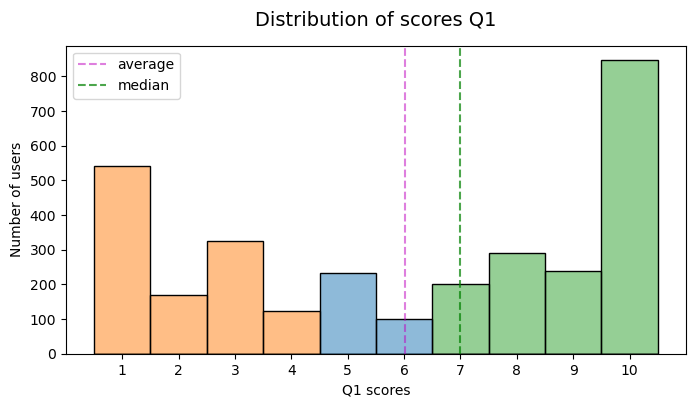

In [80]:
plot_hist(data=data, col='Q1', title='Distribution of scores Q1',
            xlab='Q1 scores', ylab='Number of users', median=True, mean=True, hue='evaluation')

By distribution, you can see that the majority, when answering the question, gave a score of 10 points, at the same time, we see a large number of people who gave an extremely unsatisfactory mark. Neutral ratings are located in the center, customers prefer to give extreme answers (either completely satisfied or not at all satisfied).\
The mean and median values are 6 and 7, respectively, which indicates a small distribution bias and a fairly good average level of quality assessment.

Let's look at the presence of dependencies of communication quality metrics.

In [81]:
def data_corr(data, metrics, filter = 0.2):
    """Returns correlation values between metrics above the set filter"""
    data_corr = data.corr()
    corr_list = data_corr[((data_corr > filter) | (data_corr < -filter)) & (data_corr < 1)][metrics].dropna()
    return corr_list

In [82]:
data_corr(data, 'Downlink Throughput(Kbps)')

Video Streaming Download Throughput(Kbps)    0.575780
Video Streaming xKB Start Delay(ms)         -0.225371
Web Page Download Throughput(Kbps)           0.266157
Name: Downlink Throughput(Kbps), dtype: float64

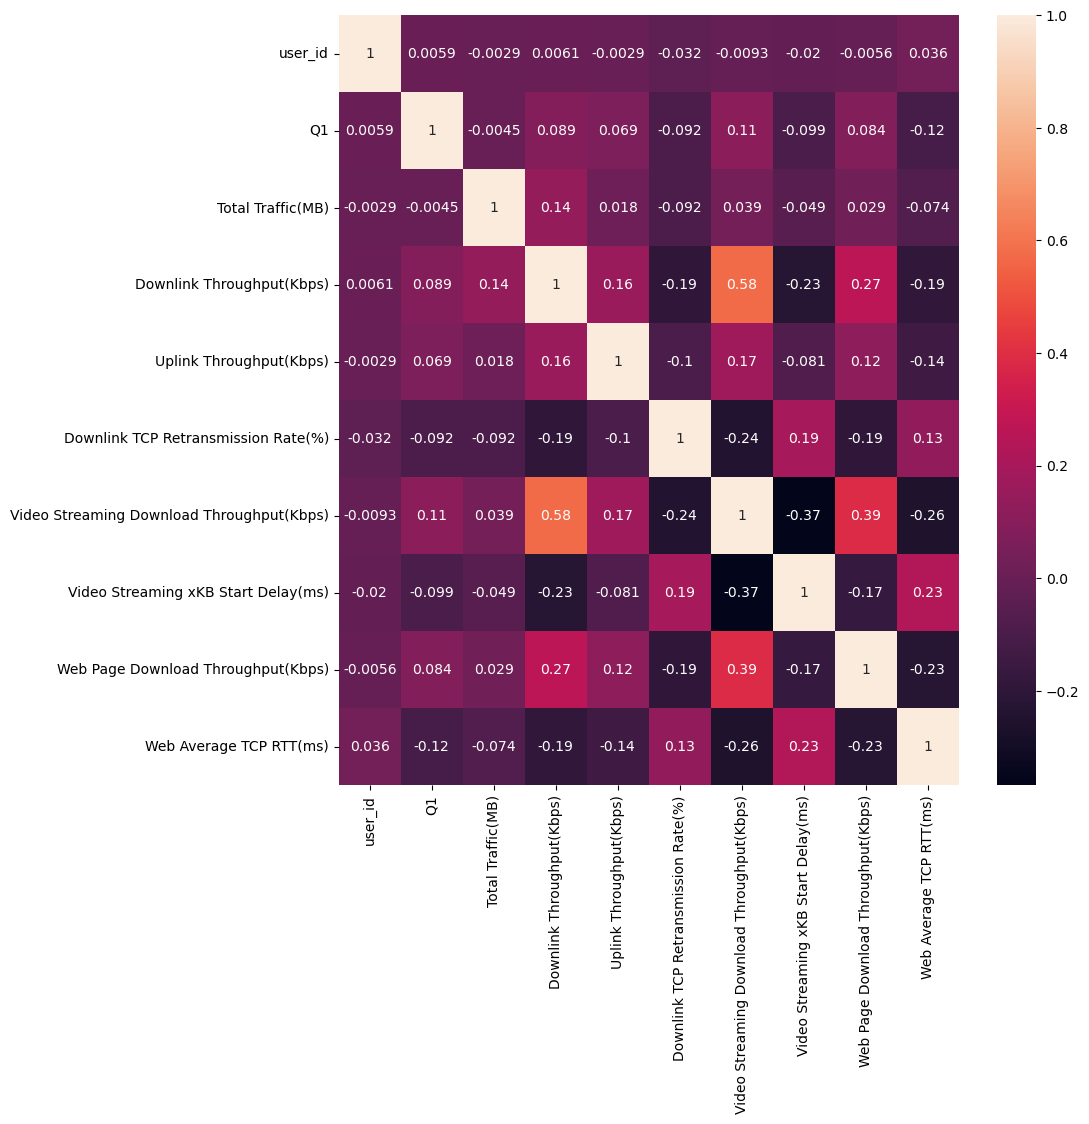

In [83]:
# Drawing a correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()


Explicit correlation between the values of the assessment of the quality of services and communication parameters was not found.
But we can note the correlation "Moderate" and "Noticeable" between the parameters:

* Video Streaming Download Throughput(Kbps);
* Video Streaming xKB Start Delay(ms);
* Web Page Download Throughput(Kbps).

It is possible that if the quality of one of the parameters is improved, it will positively affect the rest of the metrics, which will improve the customer satisfaction index as a whole.

To assess the degree of influence of technical parameters, we divide the dataset into 2 groups:
* 1) Satisfied with the quality of communication of customers (Q1 > 6),
* 2) customers dissatisfied with the quality of communication (Q1 < 5)

Let's display the distribution histograms of the "Downlink Throughput(Kbps)" metric for visual distribution in two groups.

In [84]:
def metrics_hist(data, metrics, log=False):    
    """A function to visualize the reasons why customers reduced the rating.
First removes neutral ratings and compares two groups with good and bad ratings"""
    # Weeding out the scores
    data = data[(data.Q1 >= 7) | (data.Q1 <= 4)]
    # Divide into two groups
    data['evaluation'] = data['Q1']\
        .apply(lambda x: 'Not satisfied' if x <= 4 else 'Satisfied')
    # Form the canvas
    fig, ax = plt.subplots(figsize=(10, 4))

    fig.suptitle(f'Density', y=1., fontsize=14)
    
    sns.histplot(ax=ax, data=data,
             x=metrics, hue='evaluation', stat='density',
             hue_order=data.evaluation.unique(),
             kde=True, log_scale=log, legend=False)
    if log == True:
        ax.set_xlabel('Log: ' + re.findall(r'\((\S+)\)', metrics)[0])
    else:
        ax.set_xlabel(re.findall(r'\((\S+)\)', metrics)[0])
    ax.axvline(np.median(data[data.Q1 > 4][metrics] ), linestyle='--', color='b', linewidth=3)
    ax.axvline(np.median(data[data.Q1 <= 4][metrics] ), linestyle='--', color='r', linewidth=3)
    ax.set_title(metrics)
    plt.legend(data.evaluation.unique())

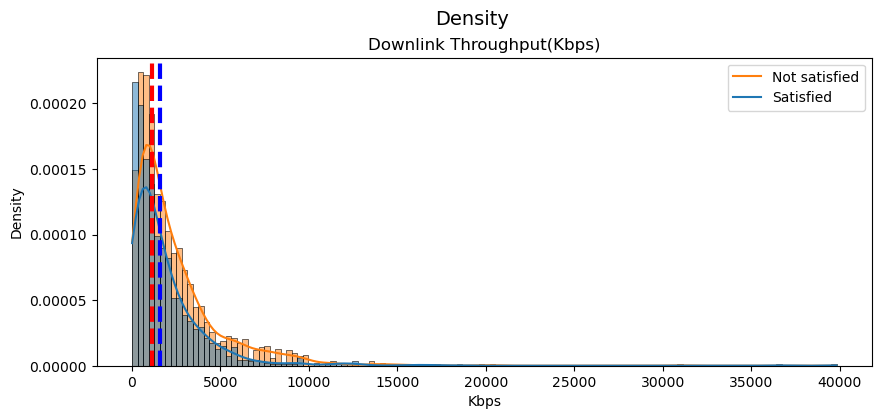

In [85]:
metrics_hist(data, "Downlink Throughput(Kbps)")

Build a histogram on a logarithmic scale.

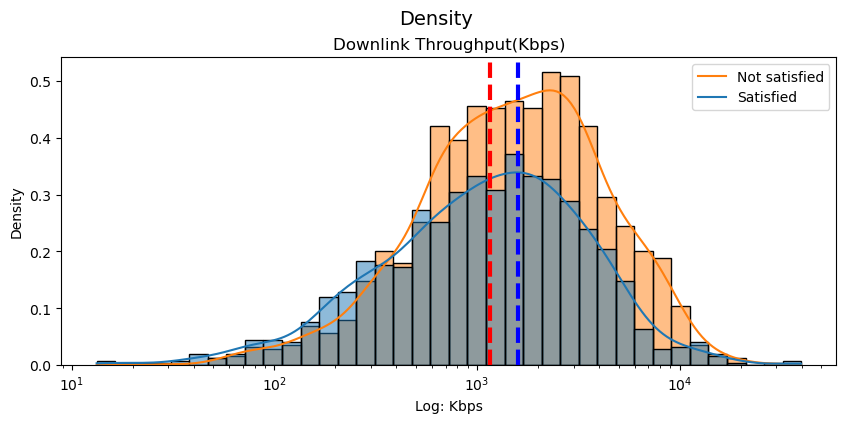

In [86]:
metrics_hist(data, "Downlink Throughput(Kbps)", log=True)

Histograms represent a non-normal distribution. The distribution of the group of dissatisfied customers is significant at low data rates. However, judging by the median value, it seems that the data transfer rate for a group of satisfied customers is higher on average. Let's check this statement with the help of statistics.

## 1.3 Statistical test

To conduct a statistical test, we define 2 hypotheses:

H0: Speed does not affect subscriber satisfaction with cellular communication. \
H1: The data transfer speed has a statistically significant difference between the two groups, namely, the majority of satisfied customers have better communication quality.

We will use the bootstrap, due to the imbalance of the samples and the insufficient number of observations.

In [87]:
def bootstrap(data_a, data_b, N=2000, title=None, conf_level = 95):
    """Bootstrap function, calculation and rendering"""
    
    # Bootstrap realization
    mean_samples_a = []
    mean_samples_b = []
    buf = []
    size_a = data_a.shape[0] 
    size_b = data_b.shape[0] 
    
    for i in range(N):
        sample_a = np.random.choice(data_a.values, size_a, True)
        mean_samples_a.append(np.mean(sample_a))
        sample_b =  np.random.choice(data_b.values, size_b, True)
        mean_samples_b.append(np.mean(sample_b))
        buf.append(np.mean(sample_a)-np.mean(sample_b))
    
    buf_cent = np.array(buf)  - np.mean(buf)
    p_value = np.mean(buf_cent >= np.mean(data_a) - np.mean(data_b))
     # Canvas initialization
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(title, y=1.05, fontsize=14)
    
    # Graphs of distribution by groups A and B
    sns.histplot(mean_samples_a, alpha=.8, ax=ax[0], kde=True, stat='density')
    sns.histplot(mean_samples_b, color='orange', alpha=.8, ax=ax[0], kde=True, stat='density')
    # Intervals and median
    left_quant = (100 - conf_level)/2
    right_quant = 100 - (100 - conf_level) / 2
    
    ax[0].axvline(np.percentile(mean_samples_a, left_quant), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_a, right_quant), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.median(mean_samples_a), linestyle='--', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, left_quant), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, right_quant), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.median(mean_samples_b), linestyle='--', color='g', linewidth=3)
    ax[0].set_title('Distribution density by groups \n of satisfied and dissatisfied customers', fontsize=14)
    ax[0].set_ylabel('Density')
    ax[0].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    ax[0].legend(['Satisfied','Not satisfied'])
    
    # Graph of the distribution of the difference in groups A and B
    sns.histplot(buf_cent, alpha=.8, ax=ax[1], kde=True, stat='density', color='g')
    # Intervals and median
    ax[1].axvline(np.percentile(buf_cent, left_quant), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.percentile(buf_cent, right_quant), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.mean(data_a) - np.mean(data_b), linestyle='--', color='b', linewidth=3)
    ax[1].set_title('Centered Difference Density of Means', fontsize=14)
    ax[1].set_ylabel('Density')
    ax[1].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    print("Bootstrap p-value:", p_value)
    return plt.show()

Bootstrap p-value: 0.0


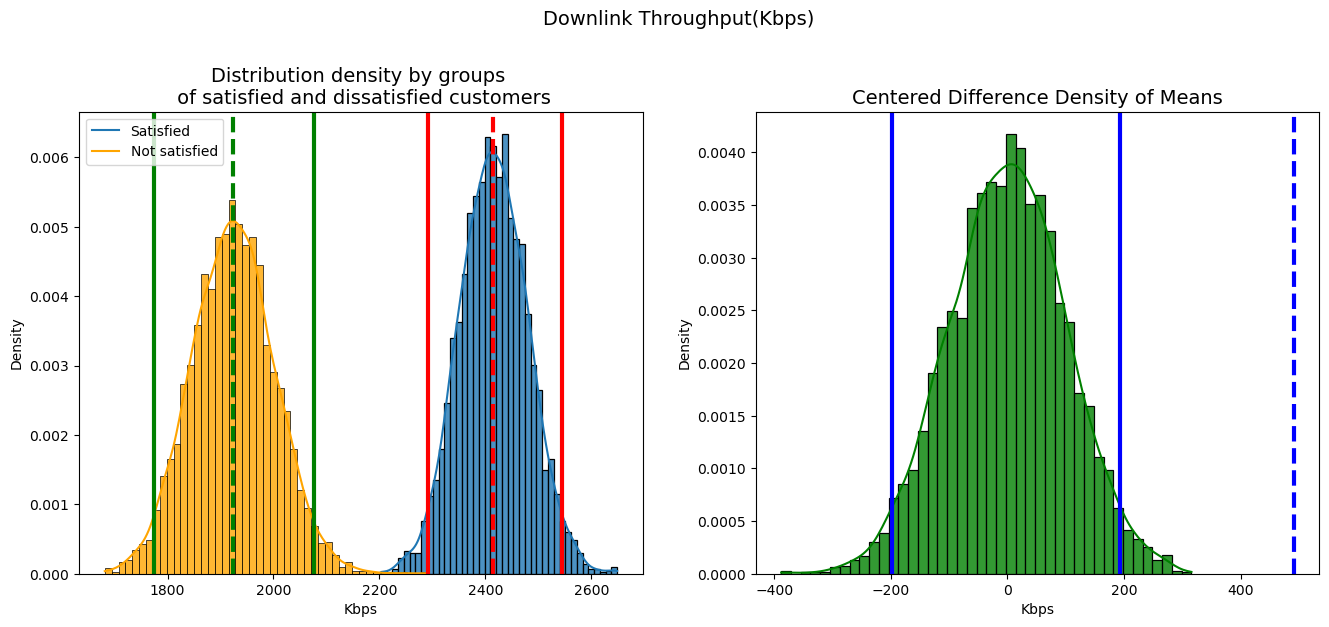

In [88]:
bootstrap(data_a=data[data['Q1'] >= 7]['Downlink Throughput(Kbps)'],
          data_b=data[data['Q1'] <= 4]['Downlink Throughput(Kbps)'],
          N=4000, title='Downlink Throughput(Kbps)', conf_level=95)

## Conclusion:
Based on the available data, at the 5% significance level (95% confidence level), there is reason to reject the null hypothesis of no difference in favor of the alternative. This means that the data transfer rate to the subscriber is lower for a group of dissatisfied customers.

In a statistical test, the value of the Internet speed metric to the subscriber was checked for customer satisfaction with communication services. Based on the available data, it can be assumed that the Internet speed "to the subscriber" has an impact on customer satisfaction with cellular communications. Also, the Internet connection speed metric correlates well with the streaming video download speed metric. That is, according to the metric of streaming video download speed, one can also judge the level of subscriber satisfaction from using communication services.

# 2 Analysis of the total amount of traffic

## 2.1 Statement of the problem

Let's study the "Total Traffic(MB)" metric to determine the statistically significant difference between the two groups of subscribers. Having determined this metric to be statistically significant, it is possible to carry out, for example, measures to adjust the pricing policy

## 2.2 Exploratory data analysis

Let's display the distribution histograms of the "Total Traffic(MB)" metric for the visual distribution in two groups.

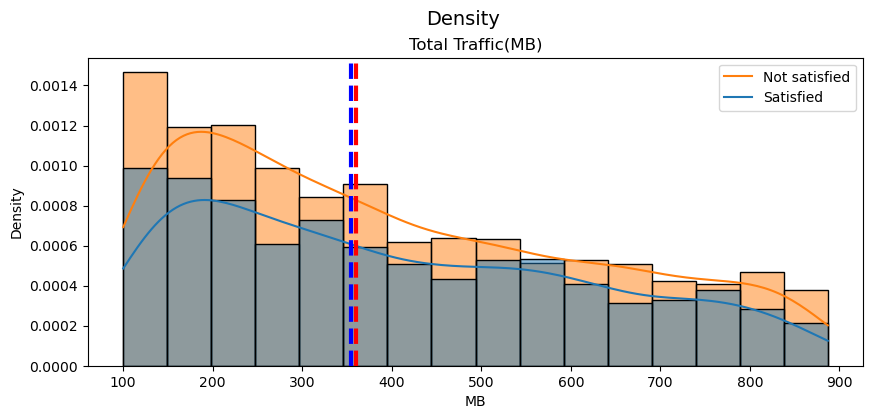

In [89]:
metrics_hist(data, "Total Traffic(MB)")

The distribution differs from normal, but the graph shows that the distributions are almost identical to each other.

## 2.3 Statistical test

Hypotheses:

* H0: The total amount of traffic is identical for both groups and does not affect the satisfaction of the subscriber with cellular communication.
* H1: The total amount of traffic has a statistically significant difference between the two groups.

Use bootstrap to test.

Bootstrap p-value: 0.665


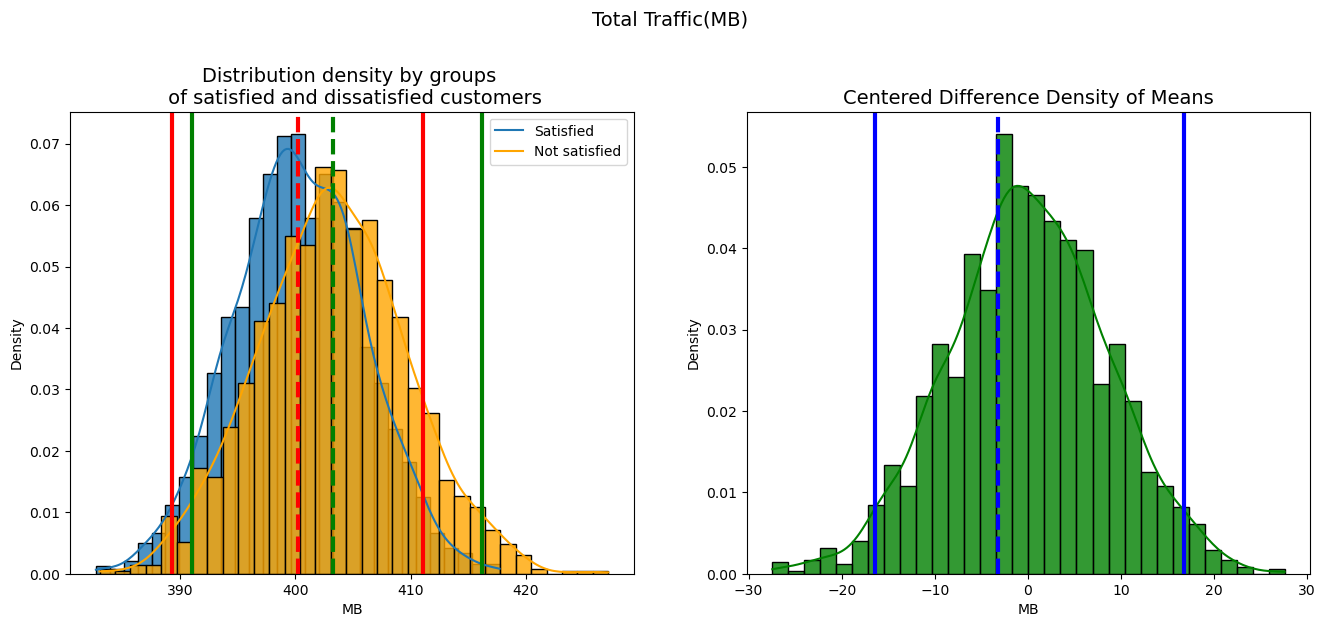

In [90]:
bootstrap(data_a = data[data['Q1'] >6 ]["Total Traffic(MB)"],
         data_b = data[data['Q1'] <5 ]["Total Traffic(MB)"],
         title = "Total Traffic(MB)")

## Conclusion:
Based on the available data, at the 5% significance level (95% confidence level), there is no reason to reject the null hypothesis of no difference. This means that both satisfied and dissatisfied customers use the same amount of traffic. The volume of traffic does not affect the degree of satisfaction.

During the statistical test, it was found that the total volume of traffic does not affect customer satisfaction. Moreover, the distributions of values are almost the same, i.e. clients with high and low Internet connection speeds use the services equally.

# 3 Analysis of the frequency of resending packets "to the subscriber"

## 3.1 Statement of the problem

Let's determine how much the frequency of resending packets affects the degree of customer satisfaction. If the impact turns out to be statistically significant, then it is worth considering the possibility of timely updating / repairing equipment for debugging channels.

## 3.2 Exploratory data analysis

Let's display the distribution histograms of the "Downlink TCP Retransmission Rate(%)" metric for visual distribution in two groups.

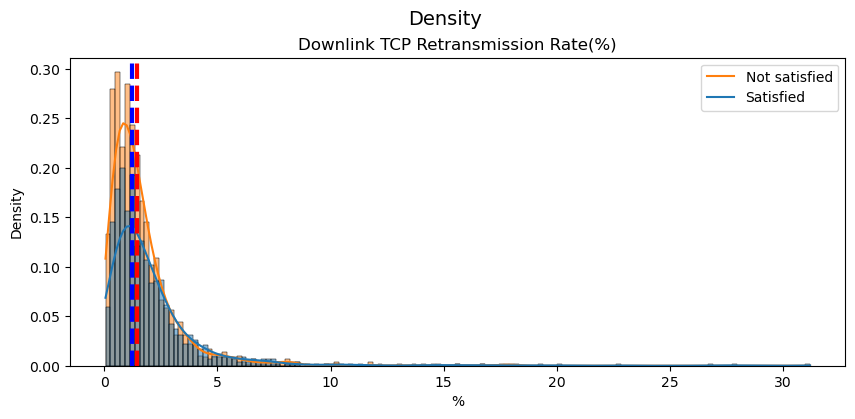

In [91]:
metrics_hist(data, "Downlink TCP Retransmission Rate(%)")

In logarithmic scale:

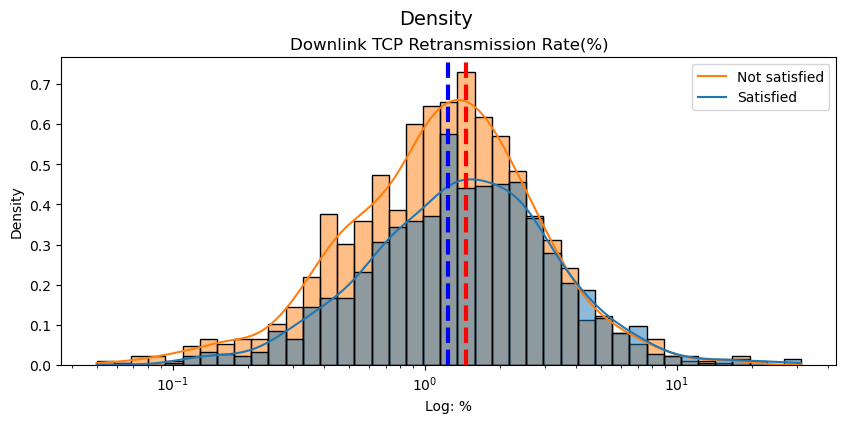

In [92]:
metrics_hist(data, "Downlink TCP Retransmission Rate(%)", log=True)

The resulting distributions are very different from normal, the median values for both groups are almost the same.

## 3.3 Statistical test

Hypotheses:

* H0: Packet retransmission frequency is identical for both groups and does not affect subscriber satisfaction with cellular communication.
* H1: The frequency of packet retransmissions has statistically significant differences between the two groups, namely, for the group of dissatisfied customers, it is higher.

We use bootstrap, as it is less sensitive to the type of distribution.

In [93]:
def bootstrap_1(data_a, data_b, N=3000, title=None, conf_level = 95):
    """Bootstrap function, calculation and rendering"""
    
    # Bootstrap realisation
    mean_samples_a = []
    mean_samples_b = []
    buf = []
    size_a = data_a.shape[0] 
    size_b = data_b.shape[0] 
    
    for i in range(N):
        sample_a = np.random.choice(data_a.values, size_a, True)
        mean_samples_a.append(np.mean(sample_a))
        sample_b =  np.random.choice(data_b.values, size_b, True)
        mean_samples_b.append(np.mean(sample_b))
        buf.append(np.mean(sample_a)-np.mean(sample_b))
    
    buf_cent = np.array(buf)  - np.mean(buf)
    p_value = np.mean(buf_cent >= np.mean(data_a) - np.mean(data_b))
     # Canvas initialization
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(title, y=1.05, fontsize=14)
    
    # Graphs of distribution by groups A and B
    sns.histplot(mean_samples_a, alpha=.8, ax=ax[0], kde=True, stat='density')
    sns.histplot(mean_samples_b, color='orange', alpha=.8, ax=ax[0], kde=True, stat='density')
    # Intervals and median
    left_quant = (100 - conf_level)/2
    right_quant = 100 - (100 - conf_level) / 2
    
    ax[0].axvline(np.percentile(mean_samples_a, left_quant), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_a, right_quant), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.median(mean_samples_a), linestyle='--', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, left_quant), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, right_quant), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.median(mean_samples_b), linestyle='--', color='g', linewidth=3)
    ax[0].set_title('Distribution density by groups \n of satisfied and dissatisfied customers', fontsize=14)
    ax[0].set_ylabel('Density')
    ax[0].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    ax[0].legend(['Not satisfied', 'Satisfied'])
    
    # Graph of the distribution of the difference in groups A and B
    sns.histplot(buf_cent, alpha=.8, ax=ax[1], kde=True, stat='density', color='g')
    # Intervals and median
    ax[1].axvline(np.percentile(buf_cent, left_quant), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.percentile(buf_cent, right_quant), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.mean(data_a) - np.mean(data_b), linestyle='--', color='b', linewidth=3)
    ax[1].set_title('Centered Difference Density of Means', fontsize=14)
    ax[1].set_ylabel('Density')
    ax[1].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    print("Bootstrap p-value:", p_value)
    return plt.show()

Bootstrap p-value: 0.0


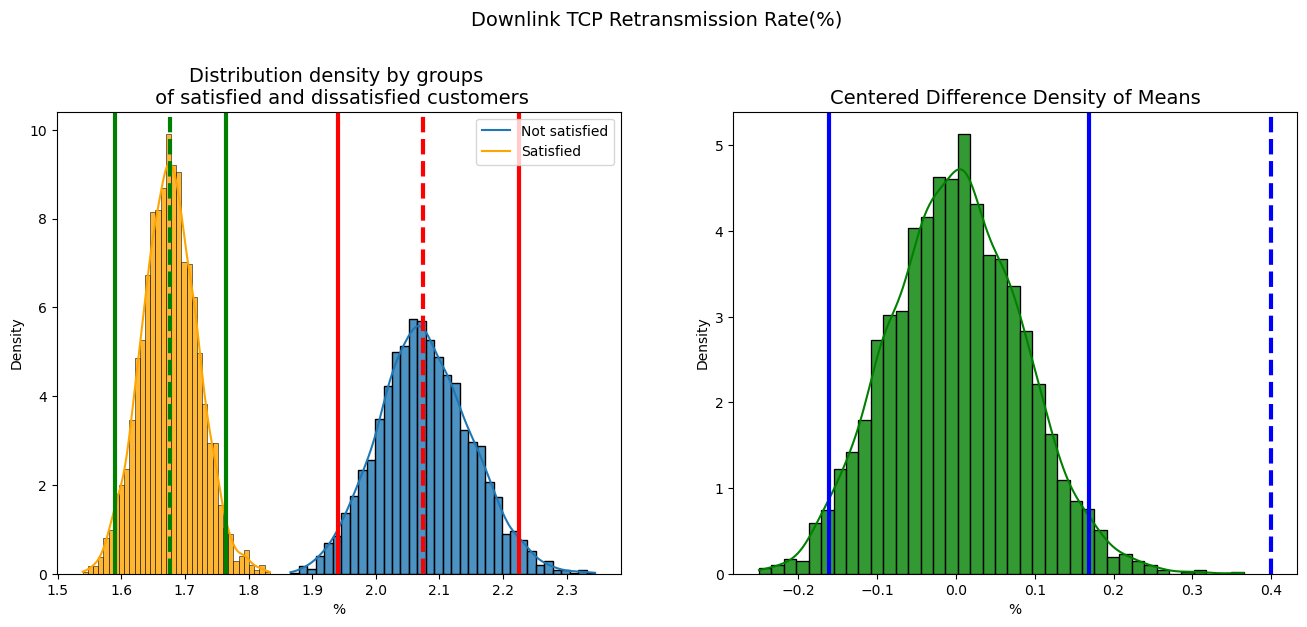

In [94]:
bootstrap_1(data_a = data[data['Q1'] <5 ]["Downlink TCP Retransmission Rate(%)"],
         data_b = data[data['Q1'] >6 ]["Downlink TCP Retransmission Rate(%)"],
         title = "Downlink TCP Retransmission Rate(%)")

## Conclusion:
Based on the available data, at the 5% significance level (95% confidence level), there is reason to reject the null hypothesis of no difference in favor of the alternative. This means that the frequency of resending the package is higher for the group of dissatisfied customers and affects the degree of satisfaction with the services.

## Post-processing Q2 responses

To understand the impact of certain technical indicators on the assessment, let's consider how users answered this question.

In [95]:
# Filter the dataset only by those customers who could answer the 2nd question, that is, when the answer to the first question was <9
data_q2 = data[data['Q1']<9]

In [96]:
data_q2.Q2.describe()

count     1315
unique      51
top          3
freq       190
Name: Q2, dtype: object

It can be seen that the majority of subscribers who gave the first question a score of < 9 did not answer the second question. Let's see what answers we have.

In [97]:
data_q2.Q2.unique()

array([nan, '4', '3', '2, 3, 4', '4, 5', '1, 3, 4', '1, 3, 4, 5', '1, 3',
       '3, 4', '1, 2', '3, 5', '1', '7', '1, 4', '1, 2, 3, 4, 5', '2, 3',
       '1, 2, 3, 4', '2, 3, 4, 5', '3, 4, 5', '1, 2, 5', '1, 5',
       '1, 2, 4', '6', '1, 4, 5', '1, 2, 3', '2, 5', '2, 4, 5', '1, 2, 7',
       '5', '2', '1, 2, 3, 4, 5, 6', '0, 1, 7', '4, 7', '1, 4, 7', '0, 3',
       '1, 3, 4, 5, 7', '3, 7', '1, 3, 4, 7', '3, 4, 5, 7', '2, 4',
       '5, 6', '1, 2, 3, 5', '1, 3, 5', '1, 2, 34', '1, 2, 4, 5',
       '0, 05, 2, 27, 7', '1, 3, 7', '3, 4, 7', '1, 2, 3, 4, 7', '10',
       '0', '1, 2, 3, 7'], dtype=object)

In general, the data is correct, filled. But there are gaps and two-digit numbers greater than 10. Commas between the answers are probably missing. Let's process the column. Remove invalid values and doubles.

In [98]:
# We replace the empty answer options with the value 6 - that is, "I find it difficult to answer"
data_q2.Q2.fillna('6', inplace=True)

In [99]:
def q2_map(ans):
    """ Q2 response processing function"""
    """ans - a string with answers to the question
        the function returns a list of digits in the response range without repetitions"""

    # Divide a string into a list of numbers using a regular expression
    ex = re.findall('\w+', ans)

    # Convert to an integer
    ex = list(map(int, ex))

    # New list to write
    new_list = []

    # Iterate over the list and check for a condition
    for element in ex:
        if 1 <= element <= 7:
            new_list.append(element)  # If the correct mark range
        elif element > 10:
            # If a two-digit number, divide by characters and check if it is in the range
            new_list += [int(x) for x in str(element) if 1 <= int(x) <= 7]
        else:
            pass
    # emove duplicates at the end
    return list(set(new_list))

In [100]:
# Splitting a row in a column into a list of values (answers) on Q2
data_q2['Q2'] = data_q2['Q2'].apply(lambda x: q2_map(x))

In [101]:
# Expanding the dataframe by expanding lists
data_q2 = data_q2.explode(column = 'Q2', ignore_index=True)

In [102]:
# Replace the empty answer options with the value 6 - that is, "I find it difficult to answer"
data_q2.Q2.fillna(6, inplace=True)

In [103]:
data_q2.Q2.unique()

array([6, 4, 3, 2, 5, 1, 7], dtype=int64)

In [104]:
# Mark the dataframe by answer options
legend = {1: 'Dialing, breaks when making calls',
           2: 'Beep ringing timeout',
           3: 'Poor communication quality in buildings',
           4: 'Slow mobile internet',
           5: 'Slow video loading',
           6: 'Difficult to answer',
           7: 'Your choice'}

data_q2['legend'] = data_q2['Q2'].map(legend)

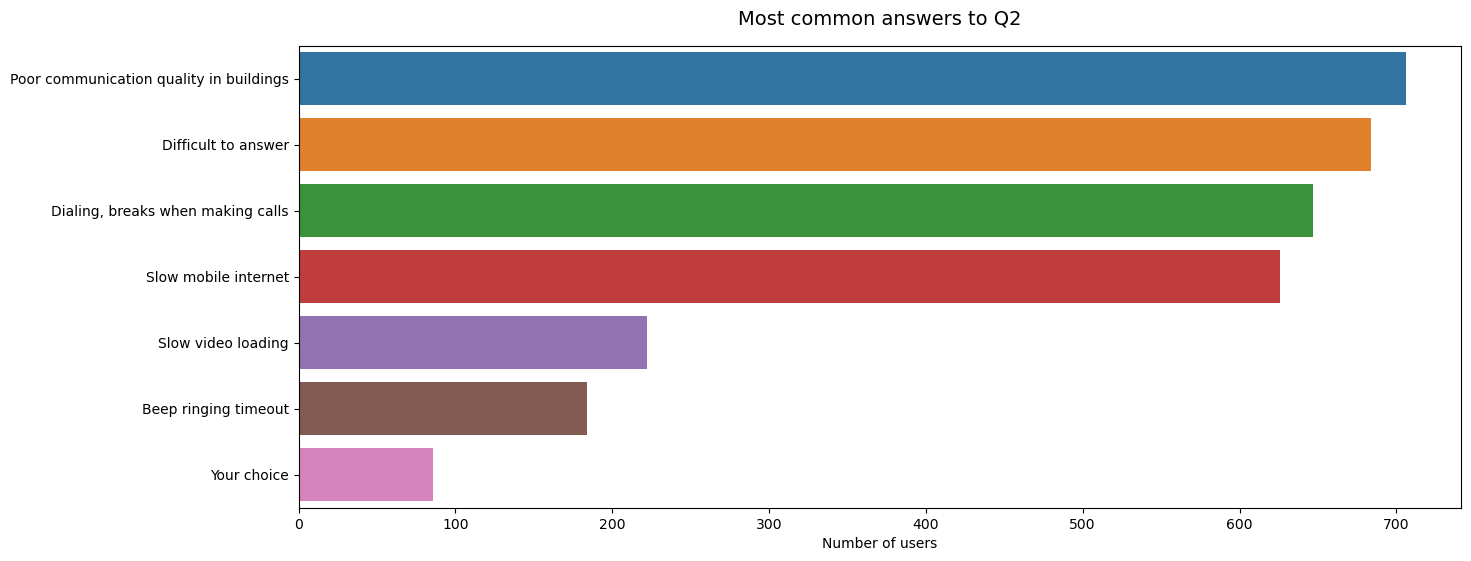

In [105]:
plt.figure(figsize=(15, 6))
sns.countplot(y='legend', data=data_q2,
              order=data_q2.groupby(['legend']).count().sort_values(by='user_id', ascending=False).index, 
              orient='h')
plt.title('Most common answers to Q2', fontsize=14, pad=15)
plt.xlabel('Number of users')
plt.ylabel('')
plt.show()

We get that the underestimated ratings are mainly due to:
* Poor communication quality in buildings
* Dialing, breaks when making calls
* Slow mobile internet

Let's try to check the ping metric when loading web pages

## 4.1 Statement of the problem

Let's check the Web Average TCP RTT(ms) metric by dividing the new sample into 2 groups: people who complain about poor connection quality, and people who are not bothered by this problem. If there are statistically significant differences, then the density of the distribution of communication channels in the city will have to be revised in order to cover the most inaccessible places.

## 4.2 Exploratory data analysis

Let's display the distribution histograms of the "Web Average TCP RTT(ms)" metric for visual distribution in two groups.

In [106]:
def metrics_hist_q2(data, metrics, log=False):    
    """A function to visualize the reasons why customers reduced the rating.
Compares two groups with and without communication criticism in buildings"""
    # Divide into two groups
    data['evaluation'] = data['Q2']\
        .apply(lambda x: 'Poor communication quality in buildings' if x == 3 else 'Others')
    # form the canvas
    fig, ax = plt.subplots(figsize=(10, 4))

    fig.suptitle(f'Density', y=1., fontsize=14)
    
    sns.histplot(ax=ax, data=data,
             x=metrics, hue='evaluation', stat='density',
             hue_order=data.evaluation.unique(),
             kde=True, log_scale=log, legend=False)
    if log == True:
        ax.set_xlabel('Log: ' + re.findall(r'\((\S+)\)', metrics)[0])
    else:
        ax.set_xlabel(re.findall(r'\((\S+)\)', metrics)[0])
    ax.axvline(np.median(data[data.Q2 == 3][metrics] ), linestyle='--', color='b', linewidth=3)
    ax.axvline(np.median(data[data.Q2 != 3][metrics] ), linestyle='--', color='r', linewidth=3)
    ax.set_title(metrics)
    plt.legend(data.evaluation.unique())

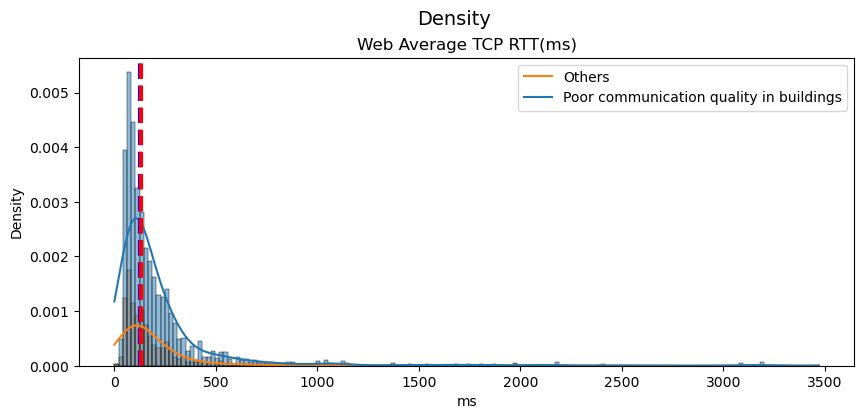

In [107]:
metrics_hist_q2(data=data_q2, metrics = "Web Average TCP RTT(ms)")

The resulting distributions are very different from normal, the median values for both groups are almost the same.

## 4.3 Statistical test

Hypotheses:

* H0: Ping when loading web pages is identical for both groups.
* H1: Ping when loading web pages has a statistically significant difference between the two groups, namely for the group of people who complain about the quality of the connection in the back it is higher.

The data is not normally distributed and unbalanced, let's try to apply the bootstrap.

In [108]:
def bootstrap_q2(data_a, data_b, N=3000, title=None, conf_level = 95):
    """Bootstrap function, calculation and rendering"""
    
    # Bootstrap implementation
    mean_samples_a = []
    mean_samples_b = []
    buf = []
    size_a = data_a.shape[0] 
    size_b = data_b.shape[0] 
    
    for i in range(N):
        sample_a = np.random.choice(data_a.values, size_a, True)
        mean_samples_a.append(np.mean(sample_a))
        sample_b =  np.random.choice(data_b.values, size_b, True)
        mean_samples_b.append(np.mean(sample_b))
        buf.append(np.mean(sample_a)-np.mean(sample_b))
    
    buf_cent = np.array(buf)  - np.mean(buf)
    p_value = np.mean(buf_cent >= np.mean(data_a) - np.mean(data_b))
     # Form canvas
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(title, y=1.05, fontsize=14)
    
    # Graphs of distribution by groups A and B
    sns.histplot(mean_samples_a, alpha=.8, ax=ax[0], kde=True, stat='density')
    sns.histplot(mean_samples_b, color='orange', alpha=.8, ax=ax[0], kde=True, stat='density')
    # Intervals and median
    left_quant = (100 - conf_level)/2
    right_quant = 100 - (100 - conf_level) / 2
    
    ax[0].axvline(np.percentile(mean_samples_a, left_quant), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_a, right_quant), linestyle='-', color='r', linewidth=3)
    ax[0].axvline(np.median(mean_samples_a), linestyle='--', color='r', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, left_quant), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.percentile(mean_samples_b, right_quant), linestyle='-', color='g', linewidth=3)
    ax[0].axvline(np.median(mean_samples_b), linestyle='--', color='g', linewidth=3)
    ax[0].set_title('Density over groups', fontsize=14)
    ax[0].set_ylabel('Density')
    ax[0].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    ax[0].legend(['Poor communication quality in buildings', 'Others'])
    
    # Graph of the distribution of the difference in groups A and B
    sns.histplot(buf_cent, alpha=.8, ax=ax[1], kde=True, stat='density', color='g')
    # Intervals and median
    ax[1].axvline(np.percentile(buf_cent, left_quant), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.percentile(buf_cent, right_quant), linestyle='-', color='b', linewidth=3)
    ax[1].axvline(np.mean(data_a) - np.mean(data_b), linestyle='--', color='b', linewidth=3)
    ax[1].set_title('Centered Difference Density of Means', fontsize=14)
    ax[1].set_ylabel('Density')
    ax[1].set_xlabel(re.findall(r'\((\S+)\)', title)[0])
    print("Bootstrap p-value:", p_value)

    return plt.show()

Bootstrap p-value: 0.9093333333333333


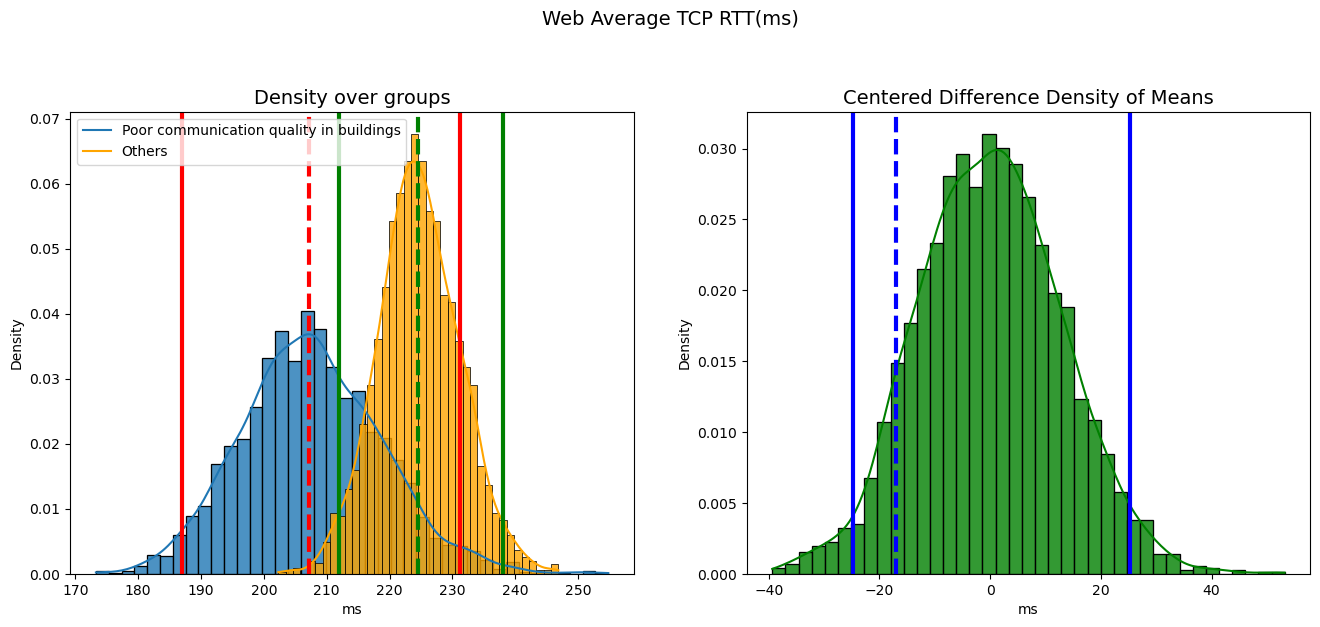

In [109]:
bootstrap_q2(data_a = data_q2[data_q2['Q2'] == 3 ][ "Web Average TCP RTT(ms)"],
         data_b = data_q2[data_q2['Q2'] != 3 ][ "Web Average TCP RTT(ms)"],
         title =  "Web Average TCP RTT(ms)")

## Conclusion:

The distribution densities overlap strongly, so we cannot reject the null hypothesis. This means that for a group of people who are dissatisfied with the quality of communication in buildings, the ping when loading web pages is the same as for a group of people who are not worried about this issue.

This is probably due to the fact that in case of problems with communication, subscribers who rate communication with a score below 9 have approximately the same low level of quality metrics, regardless of the quality of the Internet.


# General conclusion on the work done

As a result of the analysis, it was found that the majority of people who answered the first question are either extremely positive or extremely negative about the quality of the services provided.

Based on the available data, it can be assumed that the Internet speed "to the subscriber" has a statistically significant impact on customer satisfaction with cellular communications. Also, the Internet connection speed metric correlates well with the streaming video download speed metric. That is, according to the values of the download speed of streaming video, one can also judge the level of satisfaction of subscribers from the use of communication services.

A statistically significant difference was also found in the value of the frequency of packet resending for groups of satisfied and dissatisfied with the quality of communication of clients. It turned out that the frequency of resending is higher for a group of dissatisfied customers and affects the degree of satisfaction with the services. Perhaps consideration should be given to upgrading/replacing equipment in the relevant areas.

During the statistical test, it was found that the amount of total traffic does not affect customer satisfaction.

After analyzing the answers to the second question, it turned out that subscribers are mainly concerned about the poor quality of communication in buildings, missed calls and breaks during calls, as well as slow Internet.

The statistical test did not reveal a significant difference in the ping metric when loading web pages and the quality of communication in buildings. This is probably due to the fact that subscribers who rate communication with a score below 9 have approximately the same low quality metrics regardless of whether a person is in the building or not.
